# 01  Regresión Lineal y Error de Generalización
***

## Idea General

El método de **regresión lineal** es un método simple y tradicional de *ajuste de curvas*. Permite predecir un número a partir de un vector de entrada (problema de regresión).

Se busca la mejor "relación lineal" entre la variable dependiente (que llamaremos $y$) y la variable independiente ($\bf x$). En otras palabras:  *se busca construir un modelo que toma un vector ${\bf x} \in \mathbb{R}^{n}$ como entrada y predice un valor  $y \in \mathbb{R}$ como salida.*

Consideremos que $\hat{y}$ es el valor predicho por el modelo. Podemos definir la salida de este modelo como:

$$\hat{y} = {\bf w}^{\intercal}{\bf x} = w_1 x_1 + w_2 x_2 + ... +  w_n x_n $$  donde ${\bf w} \in \mathbb{R}^n$  es el vector de parámetros y representa un conjunto de **pesos** que determina como afecta cada $x_i$ en la predicción. 


+ si $x_i$ recibe un peso $w_i$ positivo $\rightarrow$ aumentar el valor de esa variable también aumenta el valor de la predicción $\hat{y}$
+ si $x_i$ recibe un peso $w_i$ negativo $\rightarrow$ aumentar el valor de esa variable disminuye el valor de la predicción $\hat{y}$
+ $w_i = 0 \rightarrow$ sin efecto en la predicción



## Tarea $T$, desempeño $P$, Error de Generalización
***

De acuerdo a la definición de Tom Mitchel [1], se dice que un programa  aprende de una experiencia E con respecto a una tarea T y alguna métrica de desempeño P, si su desempeño en T, medido por P, mejora con la experiencia E. 

Relacionando la definición anterior con la tarea de regresión lineal, la tarea $T$ corresponde a $\rightarrow$ predecir $y$ a partir del vector $\bf{x}$ generando la salida $\hat{y} =\bf{w}^{\intercal} \bf{x}$.



Necesitamos una medida de desempeño $P$, que nos permita medir el ***error de generalización*** [2].

+ Supongamos que se tiene una matrix de $m$ datos usada para evaluar el desempeño del modelo $\rightarrow \bf{X}^{(test)}$ 

+ También se tiene un vector con las etiquetas, es decir, valores correctos asociados a cada dato $\rightarrow \bf{y}^{(test)}$

+ Una forma de medir el desempeño del modelo is calcular el ***mean square error (MSE)*** (error cuadrático medio) del modelo en el conjunto de testing.

+ Si $\bf{y}^{(test)}$ es el vector  de las predicciones que entrega el modelo en el conjunto de testing, el MSE está dado por:

$$\text{MSE}_{test} = \frac{1}{m}\sum_{i} \left (\bf{\hat{y}}^{(test)} -  \bf{y}^{(test)} \right)_i^{2}$$

+ El MSE decreserá a 0 cuando $\bf{\hat{y}}^{(test)} =  \bf{y}^{(test)}$

+ Notar que:

$$\text{MSE}_{test} = \frac{1}{m}\sum_{i} || \bf{\hat{y}}^{(test)} -  \bf{y}^{(test)} ||_2^{2}$$

lo que permite interpretar que cuando la ***distancia Euclideana*** (norma $L^2$) aumenta, el MSE también aumenta.

## Construcción del Algoritmo
***
Basado en [1]

+ Para construir el **algoritmo de aprendizaje**, se debe diseñar un algoritmo que mejore los pesos $\mathbf{w}$ de manera que,

+ se **reduzca el error de generalización** dado por $\text{MSE}_{test}$, cuando el algoritmo obtiene ***experiencia*** a partir de los datos de entrenamiento.

+ Sea $(X^{(train)}, y^{(train)}) \rightarrow$ el conjunto de entrenamiento

+ La forma intuitiva de hacer lo anterior es ***minimizando el MSE en el conjunto de entrenamiento***:

$$  \nabla_{\mathbf{w}}\text{MSE}_{train} =  0$$

$$\implies \nabla_{\bf{w}} \frac{1}{m}\sum_{i} || \bf{\hat{y}}^{(train)} -  \bf{y}^{(train)} ||_2^{2} = 0 $$

$$\implies  \frac{1}{m} \nabla_{\bf{w}}|| \bf{X}^{(train)}\bf{w} -  \bf{y}^{(train)} ||_2^{2} = 0$$

$$\implies  \nabla_{\bf{w}} (\bf{X}^{(train)}\bf{w} -  \bf{y}^{(train)})^{\intercal} (\bf{X}^{(train)}\bf{w} -  \bf{y}^{(train)}) = 0$$

$$ \implies  \nabla_{\bf{w}} ( \bf{w}^{\intercal} \bf{X}^{(train)\intercal} \bf{X}^{(train)} \bf{w} - 2\bf{w}^{\intercal}\bf{X}^{(train)\intercal}\bf{y}^{(train)}  + \bf{y}^{(train)\intercal}\bf{y}^{(train)})=0 $$ 

$$\implies   2 \bf{X}^{(train)\intercal} \bf{X}^{(train)} \bf{w} - 2 \bf{X}^{(train)\intercal}\bf{y}^{(train)} = 0 $$

$$\implies \bf{w} =  (\bf{X}^{(train)\intercal} \bf{X}^{(train)})^{-1} \, \bf{X}^{(train)\intercal}\bf{y}^{(train)}  \rightarrow \text{ecuaciones normales}$$


+ Notar que el término ***regresión lineal***  también se usa para el modelo *más sofisticado* con un parámetro adicional llamado ***intercepto***, denotado por $b$:

$$\hat{y} = \mathbf{w}^{\intercal} \mathbf{x} +b \rightarrow \text{función afín}$$ 

## Ejemplo 1 Didáctico
### Con ecuaciones normales

Consideremos un dataset muy pequeño:

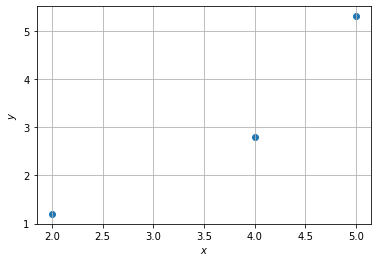

In [4]:
import numpy as np
from matplotlib import pyplot as plt

X_train = np.array([[2],[4],[5]])
y_train = np.array([[1.2], [2.8],[5.3]])

plt.figure()
plt.scatter(X_train,y_train)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.show()

In [5]:
#Escriba acá una función que reciba como parámetros  la matriz X y el vector y
# y retorne el vector w
import numpy as np

# Definir matrices
X = np.array([[1,2],[1,4],[1,5]]) # datos
y = np.array([[1.2],[2.8],[5.3]]) # etiquetas
print(X.shape, y.shape)

def normal_solution(X,y):
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # ecuación normal
    print("w_0:", w[0] , "w_1:", w[1])
    return w

(3, 2) (3, 1)


Ahora predecimos (en los mismos datos por ahora ! ):

w_0: [-1.61428571] w_1: [1.28571429]
Elapsed time: 0.0021698474884033203 segs.


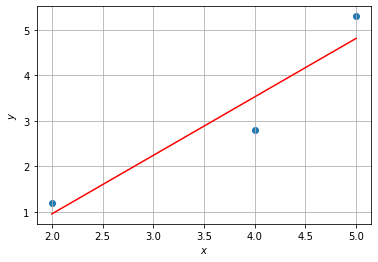

In [7]:
from time import time 
t1 = time()
w = normal_solution(X,y)
ns_time = time() - t1
print("Elapsed time:", ns_time,"segs.")

y_pred = w[0] + w[1]*X_train

plt.figure()
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,color="r")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.show()



### Con gradiente descendiente

- La idea genearal es ajustar parámetros de forma **iterativa** minimizando una función de costo o función de pérdida
- $\hat{y} = b + w_j x_j$, $j=1,\ldots,n$
- Hiperparámetro: *learning rate*


$$
\min_{\mathbf{w},b} \text{MSE}_{train}
$$
Simplificando la notación:
$$
\min_{\mathbf{w},b} \frac{1}{m}\sum_{i=1}^m \left (y^{(i)} -\hat{y}^{(i)} \right)^{2} = \min_{\mathbf{w},b} \frac{1}{m}\sum_{i=1}^m \left (y^{(i)} - (b + \mathbf{w}\mathbf{x}^{(i)})  \right)^{2}
\,\,\,\,\text{donde}\,y^{(i)} \text{es la etiqueta del}\, \mathbf{x}^{(i)}\,\text{dato de entrenamiento}
$$

- Nuevamente, debemos calcular $\nabla_{\mathbf{w},b}\text{MSE}_{train} =  0 \rightarrow$ usar derivadas parciales y la regla de la cadena:


$$
\frac{\partial \text{MSE}_{train}}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} (y^{(i)}- (b + \mathbf{w} \mathbf{x}^{(i)})) \frac{\partial }{\partial b}[y^{(i)} -(b + \mathbf{w} \mathbf{x}^{(i)})] = -\frac{2}{m} \sum_{i=1}^{m} (y^{(i)} -(b + \mathbf{w} \mathbf{x}^{(i)}))=0
$$

$$
\begin{align}
\frac{\partial \text{MSE}_{train}}{\partial w_j}  &= \frac{2}{m} \sum_{i=1}^{m} (y^{(i)} - (b + w_1 x_1^{(i)} + \ldots + w_j x_j^{(i)} + \ldots w_n x_n^{(i)})) \frac{\partial }{\partial w_j}[y^{(i)} -(b +  w_1 x_1^{(i)} + \ldots + w_j x_j^{(i)} + \ldots w_n x_n^{(i)}))]\\
& = -\frac{2}{m} \sum_{i=1}^{m} (y^{(i)} - (b + \mathbf{w} \mathbf{x}^{(i)}))x_j^{(i)}=0
\end{align}
$$

- y actualizar los valores de los parámetros $b$ y  $\mathbf{w}$:



$$
b_{new} = b_{old} - lr \,\frac{\partial \text{MSE}_{train}}{\partial b} 
$$

$$
w_{j,new} = w_{j,old} - lr\,\frac{\partial \text{MSE}_{train}}{\partial w_j} 
$$


- Esta minimización es iterativa, dando pasos en la dirección negativa del gradiente de la función.







In [9]:
from sklearn.metrics import mean_squared_error

def grad_desc_0(X,y,n_iter=100):
    w0 = 0 # valores iniciales arbitrarios
    w1 = 1
    lr = 0.001 #valor de learning rate
    iterations = n_iter
    error = []
    w1_list = []
    N = len(X) # cantidad de datos
    
    for itr in range(iterations):
        f = y - (w1*X + w0)
        w1 -= lr * (-2 * X.dot(f).sum() / N)
        w0 -= lr * (-2 * f.sum() /N)
        
        error.append(mean_squared_error(y, (w1*X + w0)))
        w1_list.append(w1)
            
            
    return w0, w1, w1_list, error


In [10]:
X= np.array([2,4,5])
y = np.array([1.2, 2.8, 5.3])
print(X.shape, y.shape)

t1 = time()
w0, w1, w1_list, error = grad_desc_0(X,y)
gd_time = time() - t1
print("Elapsed time:", gd_time, "sgs.")
print("w_0:", w0, "w_1:", w1)

y_pred = w0 + w1*X
#print(y_pred)

(3,) (3,)
Elapsed time: 0.03444075584411621 sgs.
w_0: -0.05561955282686022 w_1: 0.9066065481905947


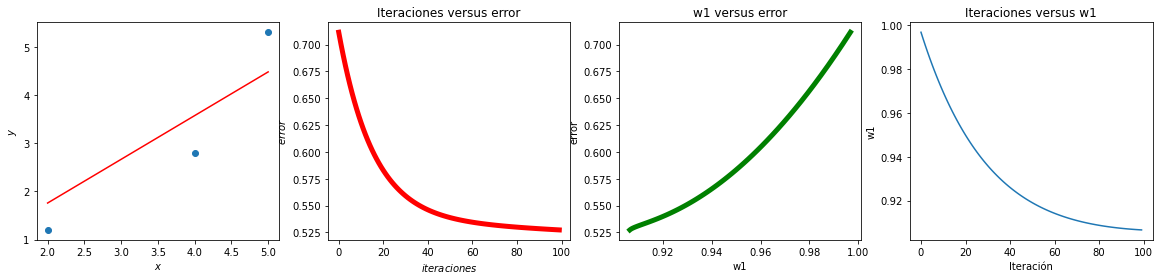

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_figheight(4)
fig.set_figwidth(20)
ax1.scatter(X,y)
ax1.plot(X,y_pred,color="red")
ax1.set_ylabel("$y$")
ax1.set_xlabel("$x$")

ax2.plot( error, color="red",linewidth=5)
ax2.set_ylabel("$error$")
ax2.set_xlabel("$iteraciones$")
ax2.set_title("Iteraciones versus error")

ax3.plot(w1_list, error, color="green",linewidth=5)
ax3.set_title("w1 versus error")
ax3.set_xlabel("w1")
ax3.set_ylabel("error")

ax4.plot(w1_list)
ax4.set_title("Iteraciones versus w1")
ax4.set_xlabel("Iteración")
ax4.set_ylabel("w1")

plt.show()

### Ejemplo 2:
- Generemos un dataset que parezca lineal:

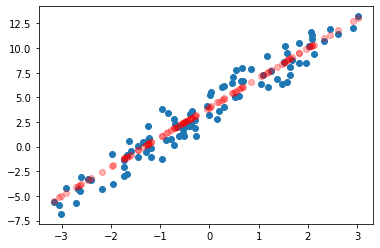

Elapsed time: 0.27303504943847656 segs.
w0_diab: 3.2879250736715395 w1_diab: 2.995089731375323


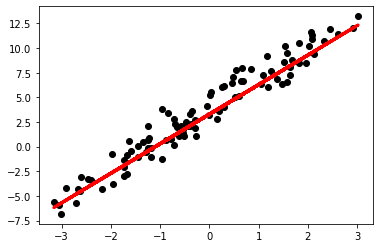

In [24]:
X = 2 * np.random.randn(100,1) # se agrega error con distribución normal
y = 4 + 3*X + np.random.randn(100,1)
y_ = 4 + 3*X 

plt.figure()
plt.scatter(X,y)
plt.scatter(X,y_,color="red", alpha=0.3)
plt.show()

t1 = time()
w0_new, w1_new, w1_list_new, error_new = grad_desc_0(X[:,0],y[:,0],1000)
new_time_gd = time() - t1
print("Elapsed time:", new_time_gd, "segs.")
print("w0_diab:",w0_new, "w1_diab:", w1_new)

new_y_pred = w0_new + w1_new*X

plt.figure()
plt.scatter(X, y,  color='black')
plt.plot(X, new_y_pred, color='red', linewidth=3)
plt.show()

w_0: [3.85670007] w_1: [3.07879179]
Elapsed time: 0.008141040802001953 segs.


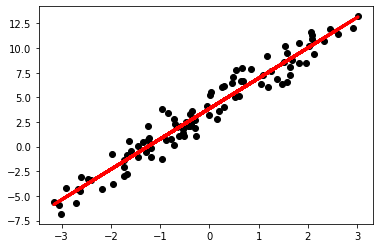

In [25]:
X_2 = np.ones((X.shape[0], X.shape[1]+1))
X_2[:,1:2] = X
t1 = time()
w_new = normal_solution(X_2,y)
new_time_ns = time() - t1
print("Elapsed time:", new_time_ns, "segs.")
new_pred_ns = w_new[0] + w_new[1]*X

plt.figure()
plt.scatter(X, y,  color='black')
plt.plot(X, new_pred_ns, color='red', linewidth=3)
plt.show()

### Ejemplo 3:  Diabetes dataset

- Usemos el dataset [diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes). 
- La descripción de este dataset [acá](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). 


(442, 10) (442,)


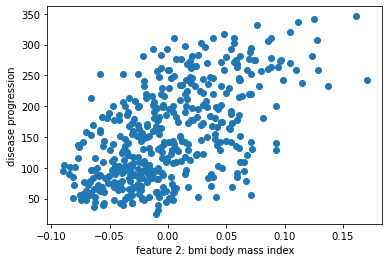

(422, 1) (20, 1)
(422,) (20,)
Elapsed time: 328.5427441596985 segs.
w0_diab: 152.92365383554844 w1_diab: 928.1276769230473


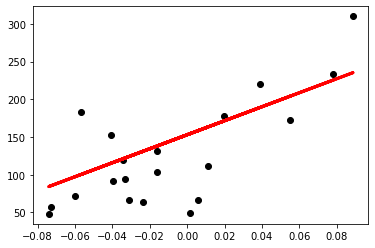

In [26]:
# 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape, diabetes_y.shape)

plt.figure()
plt.scatter(diabetes_X[:,2],diabetes_y)
plt.xlabel("feature 2: bmi body mass index")
plt.ylabel("disease progression") #one year after baseline
plt.show()

diabetes_X = diabetes_X[:,2:3]
diab_X_train = diabetes_X[0:-20,:]#[:-20]
diab_X_test = diabetes_X[-20:]
diab_y_train = diabetes_y[:-20]
diab_y_test = diabetes_y[-20:]

print(diab_X_train.shape, diab_X_test.shape)
print(diab_y_train.shape, diab_y_test.shape)

t1 = time()
w0_diab, w1_diab, w1_list_diab, error_diab = grad_desc_0(diab_X_train[:,0],diab_y_train,1000000)
diab_time_gd = time() - t1
print("Elapsed time:", diab_time_gd, "segs.")
print("w0_diab:",w0_diab, "w1_diab:", w1_diab)

diab_y_pred_GD = w0_diab + w1_diab*diab_X_test

plt.figure()
plt.scatter(diab_X_test, diab_y_test,  color='black')
plt.plot(diab_X_test, diab_y_pred_GD, color='red', linewidth=3)
plt.show()

In [27]:
diab_X_train_2 = np.ones((diab_X_train.shape[0], diab_X_train.shape[1]+1))
diab_X_train_2[:,1:2] = diab_X_train
#print(diab_X_train_2)

w_0: 152.91886182616173 w_1: 938.2378612512634
Elapsed time: 0.0025551319122314453 segs.


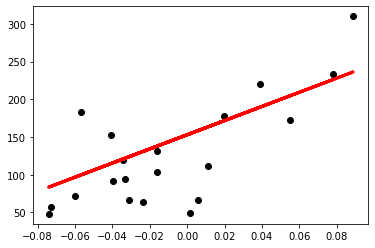

In [28]:
t1 = time()
w_diab = normal_solution(diab_X_train_2,diab_y_train)
diab_time_ns = time() - t1
print("Elapsed time:", diab_time_ns, "segs.")
diab_y_pred_NS = w_diab[0] + w_diab[1]*diab_X_test

plt.figure()
plt.scatter(diab_X_test, diab_y_test,  color='black')
plt.plot(diab_X_test, diab_y_pred_NS, color='red', linewidth=3)
plt.show()

Elapsed time: 0.013586044311523438 segs.
Coeficientes: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


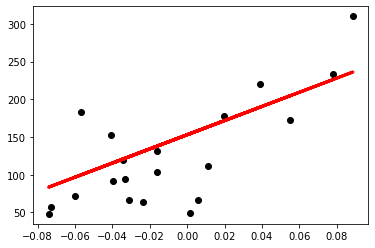

In [29]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
t1 = time()
regr.fit(diab_X_train, diab_y_train)
lr_diab_time = time() - t1
print("Elapsed time:", lr_diab_time, "segs.")
# Make predictions using the testing set
diab_y_pred = regr.predict(diab_X_test)

print('Coeficientes: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(diab_y_test, diab_y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(diab_y_test, diab_y_pred))

# Plot outputs
plt.figure()
plt.scatter(diab_X_test, diab_y_test,  color='black')
plt.plot(diab_X_test, diab_y_pred, color='red', linewidth=3)
plt.show()

## En la práctica ... no se usa el método de gradiente descendiente
- es lento
- no se garantiza llegar al mínimo global
- se introduce el hiperparámetro asociado al learning rate


## y las ecuaciones normales
- es lento
- numéricamente inestable

# Referencias
***
[1] Machine Learning, Tom Mitchell, McGraw Hill, 1997. http://www.cs.cmu.edu/~tom/mlbook.html 

[2] Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.

[3] https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57